In [1]:
import zipfile
zip_path = "/content/drive/MyDrive/stuff/catsvdogs.zip"
extract_to = "/content/dataset"
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

# Imports

In [2]:
import random
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

Loading Data

In [3]:
X = np.loadtxt('/content/dataset/input.csv', delimiter=',')
Y = np.loadtxt('/content/dataset/labels.csv', delimiter=',')
X_test = np.loadtxt('/content/dataset/input_test.csv', delimiter=',')
Y_test = np.loadtxt('/content/dataset/labels_test.csv', delimiter=',')

In [4]:
print(f"Original shapes -> X: {X.shape}, Y: {Y.shape}, X_test: {X_test.shape}, Y_test: {Y_test.shape}")

Original shapes -> X: (2000, 30000), Y: (2000,), X_test: (400, 30000), Y_test: (400,)


In [5]:

X = X.reshape(-1, 100, 100, 3) / 255.0
Y = Y.reshape(-1, 1)
X_test = X_test.reshape(-1, 100, 100, 3) / 255.0
Y_test = Y_test.reshape(-1, 1)


X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.2, random_state=42)
print(f"Split shapes -> X_train: {X_train.shape}, X_val: {X_val.shape}, X_test: {X_test.shape}")

Split shapes -> X_train: (1600, 100, 100, 3), X_val: (400, 100, 100, 3), X_test: (400, 100, 100, 3)


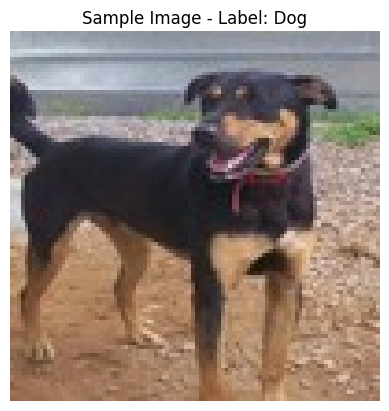

In [15]:
idx = random.randint(0, len(X_train) - 1)
plt.imshow(X_train[idx])
plt.title(f"Sample Image - Label: {'Cat' if Y_train[idx]==1 else 'Dog'}")
plt.axis('off')
plt.show()

# Model

In [16]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(100,100,3)),
    MaxPooling2D((2,2)),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D((2,2)),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D((2,2)),

    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.3),  # Helps with overfitting
    Dense(1, activation='sigmoid')  # Binary classification
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [17]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Define data augmentation generator
datagen = ImageDataGenerator(
    rotation_range=20,
    zoom_range=0.15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode="nearest"
)

# Fit generator (optional but harmless)
datagen.fit(X_train)

In [18]:
history = model.fit(
    datagen.flow(X_train, Y_train, batch_size=32),
    validation_data=(X_val, Y_val),
    steps_per_epoch=len(X_train) // 32,
    epochs=45
)

# Evaluate on test data
test_loss, test_acc = model.evaluate(X_test, Y_test)
print(f"\nTest Accuracy: {test_acc:.4f}, Test Loss: {test_loss:.4f}")


Epoch 1/45


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


50/50 ━━━━━━━━━━━━━━━━━━━━ 11s 136ms/step - accuracy: 0.5030 - loss: 0.6964 - val_accuracy: 0.4975 - val_loss: 0.6916
Epoch 2/45
50/50 ━━━━━━━━━━━━━━━━━━━━ 4s 78ms/step - accuracy: 0.4969 - loss: 0.6924 - val_accuracy: 0.5150 - val_loss: 0.6921
Epoch 3/45
50/50 ━━━━━━━━━━━━━━━━━━━━ 4s 80ms/step - accuracy: 0.5359 - loss: 0.6943 - val_accuracy: 0.5250 - val_loss: 0.6881
Epoch 4/45
50/50 ━━━━━━━━━━━━━━━━━━━━ 5s 103ms/step - accuracy: 0.5375 - loss: 0.6858 - val_accuracy: 0.5675 - val_loss: 0.6795
Epoch 5/45
50/50 ━━━━━━━━━━━━━━━━━━━━ 5s 89ms/step - accuracy: 0.5404 - loss: 0.6841 - val_accuracy: 0.5875 - val_loss: 0.6727
Epoch 6/45
50/50 ━━━━━━━━━━━━━━━━━━━━ 4s 77ms/step - accuracy: 0.5815 - loss: 0.6782 - val_accuracy: 0.5475 - val_loss: 0.6785
Epoch 7/45
50/50 ━━━━━━━━━━━━━━━━━━━━ 5s 99ms/step - accuracy: 0.5886 - loss: 0.6775 - val_accuracy: 0.5825 - val_loss: 0.6716
Epoch 8/45
50/50 ━━━━━━━━━━━━━━━━━━━━ 5s 96ms/step - accuracy: 0.6231 - loss: 0.6488 - val_accuracy: 0.5475 - val_loss:

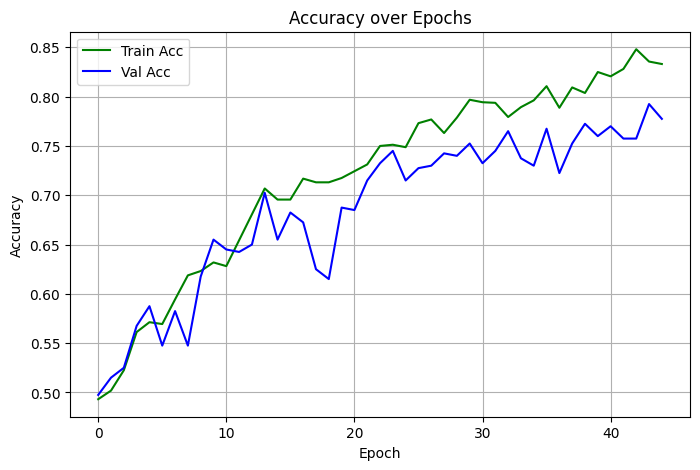

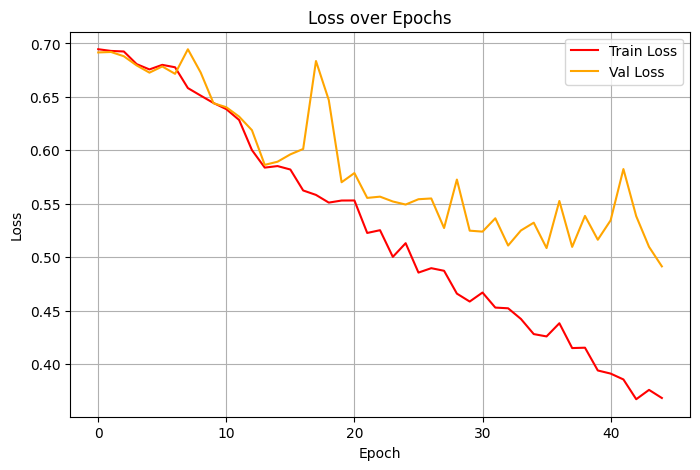

In [19]:
plt.figure(figsize=(8,5))
plt.plot(history.history['accuracy'], label='Train Acc', color='green')
plt.plot(history.history['val_accuracy'], label='Val Acc', color='blue')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Plot training and validation loss
plt.figure(figsize=(8,5))
plt.plot(history.history['loss'], label='Train Loss', color='red')
plt.plot(history.history['val_loss'], label='Val Loss', color='orange')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

Prediction

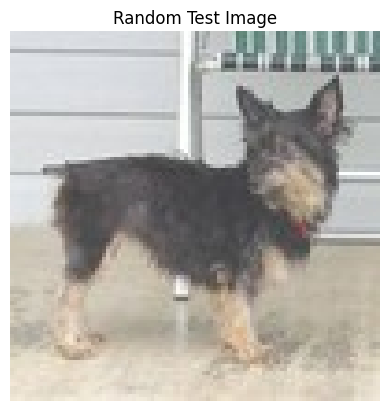

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Predicted Probability: 0.55710584
Predicted Class: Cat


In [23]:
idx2 = random.randint(0, len(Y_test) - 1)
plt.imshow(X_test[idx2])
plt.title("Random Test Image")
plt.axis('off')
plt.show()

# Predict on the selected image
y_pred = model.predict(X_test[idx2].reshape(1, 100, 100, 3))
print("Predicted Probability:", y_pred[0][0])
print("Predicted Class:", "Cat" if y_pred > 0.5 else "Dog")


# Testing an image from the internet

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


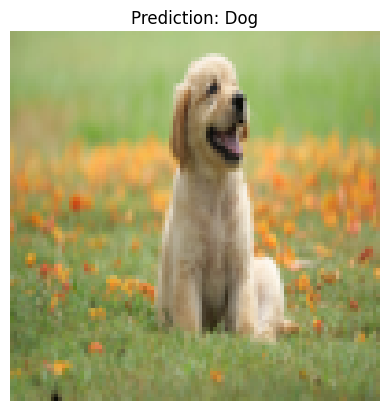

In [21]:
from PIL import Image
import requests
from io import BytesIO
import numpy as np
import matplotlib.pyplot as plt

# URL of the image you want to test
image_url = 'https://hips.hearstapps.com/hmg-prod/images/dog-puppy-on-garden-royalty-free-image-1586966191.jpg?crop=1xw:0.74975xh;0,0.190xh&resize=1200:*'  # example cat image

# Step 1: Load image from URL
response = requests.get(image_url)
img = Image.open(BytesIO(response.content))

# Step 2: Resize to 100x100
img = img.resize((100, 100))

# Step 3: Convert to NumPy array and normalize
img_array = np.array(img)

# Handle grayscale or RGBA images
if img_array.shape[-1] == 4:  # RGBA
    img_array = img_array[:, :, :3]  # Remove alpha channel
elif len(img_array.shape) == 2:  # Grayscale
    img_array = np.stack((img_array,) * 3, axis=-1)  # Convert to RGB

# Normalize
img_array = img_array / 255.0

# Step 4: Reshape to match input shape
img_input = img_array.reshape(1, 100, 100, 3)

# Step 5: Predict
prediction = model.predict(img_input)
label = "Cat" if prediction > 0.5 else "Dog"

# Step 6: Show image and prediction
plt.imshow(img_array)
plt.title(f"Prediction: {label}")
plt.axis('off')
plt.show()


In [24]:
model.save('cat_dog_classifier.h5')

In [ ]:
from tensorflow.keras.models import load_model

# Load the model
model = load_model('cat_dog_classifier.h5')  # or .keras if you used that format
